In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
import seaborn as sns
import math

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif

In [18]:
%run prepro.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169605 entries, 0 to 169604
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 169605 non-null  int64  
 1   loc                169605 non-null  float64
 2   v(g)               169605 non-null  float64
 3   ev(g)              169605 non-null  float64
 4   iv(g)              169605 non-null  float64
 5   n                  169605 non-null  float64
 6   v                  169605 non-null  float64
 7   l                  169605 non-null  float64
 8   d                  169605 non-null  float64
 9   i                  169605 non-null  float64
 10  e                  169605 non-null  float64
 11  b                  169605 non-null  float64
 12  t                  169605 non-null  float64
 13  lOCode             169605 non-null  int64  
 14  lOComment          169605 non-null  int64  
 15  lOBlank            169605 non-null  int64  
 16  lo

In [19]:
df_x = df.drop(columns='defects')
df_y = df.defects

In [20]:
def filter_variance(df :pd.DataFrame, threshold :float):
    selector = VarianceThreshold(threshold=threshold)
    df_r = pd.DataFrame(selector.fit_transform(df), columns=selector.get_feature_names_out(df.columns))
    return df_r, selector

In [12]:
df_var_filtered, selector = filter_variance(df_x, 0.15)

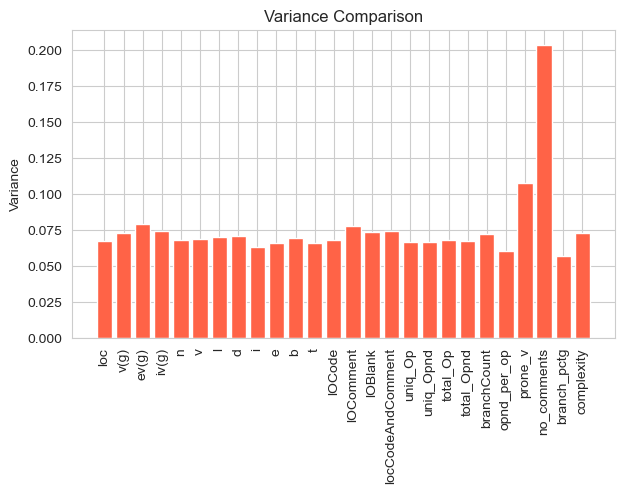

[0.06720886 0.07303769 0.07905935 0.07446961 0.06795759 0.06916945
 0.06990021 0.0711017  0.0630132  0.06617577 0.06948255 0.06611153
 0.06836454 0.07818923 0.07362332 0.07451308 0.06646177 0.06702905
 0.06799748 0.06749088 0.0721391  0.06065578 0.10749102 0.20369276
 0.05687817 0.073202  ]


In [21]:
selector = VarianceThreshold(threshold=0.0)
selector.fit(df_x)
plt.figure(figsize=(7,4))
plt.bar(x=df_x.columns, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()
print(selector.variances_)

In [8]:


def filter_mi(df_x :pd.DataFrame, df_y :pd.DataFrame, threshold :float):
    
    MI_score = mutual_info_classif(df_x, df_y, random_state=0, n_neighbors=3)
    
    df_r = df_x.drop(columns=df_x.columns[MI_score<=threshold])
    
    return df_r,MI_score
    # Print the name and mutual information score of each feature
     #for feature in zip(df_filtered.columns, MI_score):
      #   print(feature)


In [9]:
df_mi_filtered, MI_score = filter_mi(df_x[~pre_df.outcome.isna()], 
                                  OrdinalEncoder().fit_transform(df_y[~pre_df.outcome.isna()].to_numpy().reshape(-1, 1)).ravel(),
                                  0.01)

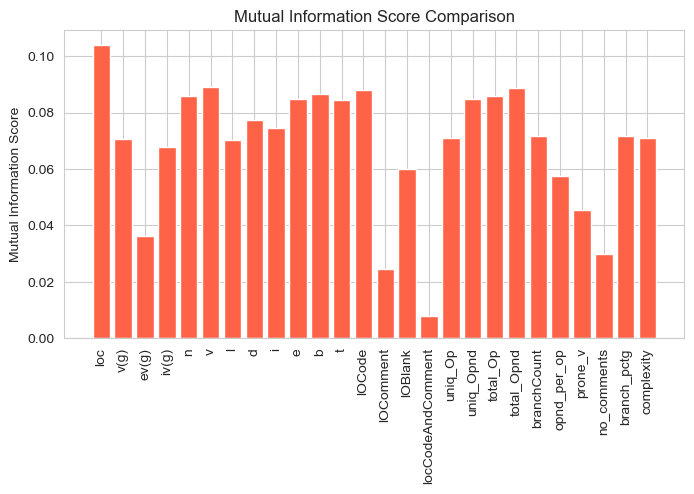

In [24]:
MI_score = mutual_info_classif(df_x[~df.defects.isna()], 
                                  OrdinalEncoder().fit_transform(df_y[~df.defects.isna()].to_numpy().reshape(-1, 1)).ravel(), random_state=0, n_neighbors=3)
plt.figure(figsize=(8,4))
plt.bar(x=df_x.columns, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

In [11]:
df_mi_filtered

,surgery,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,peristalsis,abdominal_distention,nasogastric_reflux,...,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_moderate,pain_severe_pain,pain_slight,abdomen_distend_small,lesion_1_gastric,lesion_1_none
0,1.0,0.000000,0.324675,-0.636364,-0.333333,-0.333333,1.0,-1.000000,-0.333333,0.333333,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
1,1.0,-0.222222,-0.246753,-0.909091,-0.333333,0.333333,0.2,-1.000000,0.333333,1.000000,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2,1.0,0.074074,0.168831,-0.545455,-0.333333,-0.333333,-0.2,-0.333333,0.333333,-1.000000,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1.0,-0.370370,-0.454545,-0.500000,-1.000000,-0.333333,-0.2,-0.333333,0.333333,1.000000,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
4,-1.0,-0.037037,-0.714286,-0.090909,0.333333,0.333333,-1.0,-0.333333,-1.000000,0.333333,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.0,0.148148,0.285714,-0.090909,-0.333333,-0.333333,-0.2,-1.000000,0.333333,1.000000,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1231,1.0,-0.222222,-0.610390,-0.045455,-0.333333,-0.333333,0.2,-0.333333,-0.333333,-1.000000,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
1232,1.0,-0.222222,-0.298701,-0.272727,0.333333,-0.333333,-1.0,-0.333333,-0.333333,-1.000000,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1233,1.0,0.000000,-0.480519,-0.818182,0.333333,-0.333333,0.6,-0.333333,-0.333333,1.000000,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [54]:
from sklearn.feature_selection import SelectKBest

# Create a SelectKBest object
#skb = SelectKBest(score_func=mutual_info_classif, 
#                  k=12) 
#skb.fit(df_filtered[0:len(train)], OrdinalEncoder().fit_transform(target[0:len(train)].to_numpy().reshape(-1, 1)).ravel())


SelectKBest(k=12,
            score_func=<function mutual_info_classif at 0x0000019E55B46340>)

In [57]:
#df_filtered = pd.DataFrame(skb.transform(df_filtered),columns=skb.get_feature_names_out(df_filtered.columns))
#df_filtered

,temp_of_extremities,mucous_membrane,capillary_refill_time,peristalsis,nasogastric_reflux_ph,rectal_exam_feces,total_protein,abdomo_appearance,surgical_lesion,pain_alert,pain_mild_pain,pain_severe_pain
0,0.333333,1.0,1.0,0.000000,0.846154,0.333333,0.058480,1.0,1.0,0.0,0.0,0.0
1,0.333333,0.6,1.0,0.000000,0.153846,0.000000,0.707602,1.0,1.0,0.0,1.0,0.0
2,0.333333,0.4,0.0,0.333333,0.384615,0.000000,0.033918,1.0,1.0,0.0,0.0,0.0
3,0.000000,0.4,1.0,0.333333,0.153846,0.333333,0.040936,0.5,1.0,0.0,1.0,0.0
4,0.666667,0.0,0.0,0.333333,0.923077,0.666667,0.044444,0.5,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.333333,0.0,1.0,0.333333,0.923077,0.666667,0.053801,1.0,1.0,0.0,0.0,0.0
2055,0.333333,0.6,1.0,0.000000,0.153846,0.000000,0.730994,1.0,1.0,0.0,0.0,0.0
2056,0.333333,1.0,1.0,0.333333,0.846154,0.333333,0.047953,1.0,1.0,0.0,0.0,0.0
2057,0.666667,0.0,0.0,0.333333,0.923077,0.666667,0.059649,0.0,0.0,0.0,1.0,0.0


In [7]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

params = {'eta': 0.03659792270411458,
 'n_estimators': 347,
 'max_depth': 7,
 'reg_lambda': 6.927400217253017,
 'subsample': 0.7962514437751362,
 'min_child_weight': 5,
 'colsample_bytree': 0.7244433782269522,
 'objective': 'multi:softmax'}
xgb_tuned = XGBClassifier(**params)

efs = SFS(estimator=xgb_tuned,  
          k_features=(5,30),
          scoring='f1_micro',  
          cv=3,n_jobs=-1,forward=False)                


#efs = efs.fit(df_x[~pre_df.outcome.isna()], OrdinalEncoder().fit_transform(df_y[~pre_df.outcome.isna()].to_numpy().reshape(-1, 1)).ravel())



In [16]:
#print(efs.k_score_)
#print(efs.k_feature_names_)
#print(len(efs.k_feature_names_))


0.7141808203214199
('surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'mucous_membrane', 'capillary_refill_time', 'peristalsis', 'abdominal_distention', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'cp_data', 'pain_alert', 'pain_depressed', 'pain_mild_pain', 'pain_moderate', 'pain_severe_pain', 'pain_slight', 'abdomen_distend_large', 'abdomen_firm', 'lesion_1_gastric', 'lesion_1_lgcolon', 'lesion_1_none', 'lesion_1_retumdesccolon')
30


In [ ]:
('surgery', 'rectal_temp', 'pulse', 'mucous_membrane', 'peristalsis', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'surgical_lesion', 'cp_data', 'hospital_dig', 'pain_alert', 'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain', 'abdomen_distend_large', 'abdomen_firm', 'abdomen_other', 'lesion_1_cecum', 'lesion_1_gastric', 'lesion_1_none', 'lesion_1_retumdesccolon', 'lesion_1_transversecolon')

('surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'mucous_membrane', 'capillary_refill_time', 'peristalsis', 'abdominal_distention', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'cp_data', 'pain_alert', 'pain_depressed', 'pain_mild_pain', 'pain_moderate', 'pain_severe_pain', 'pain_slight', 'abdomen_distend_large', 'abdomen_firm', 'lesion_1_gastric', 'lesion_1_lgcolon', 'lesion_1_none', 'lesion_1_retumdesccolon')



In [8]:
filter_method = 'filter'
filter_method = 'wrap'
if filter_method == 'filter':
    df_filtered = df_x[df_mi_filtered.columns.join(df_var_filtered.columns, how='outer')]
else:
    columns = ['surgery', 'rectal_temp', 'pulse', 'mucous_membrane', 'peristalsis', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'surgical_lesion', 'cp_data', 'hospital_dig', 'pain_alert', 'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain', 'abdomen_distend_large', 'abdomen_firm', 'abdomen_other', 'lesion_1_cecum', 'lesion_1_gastric', 'lesion_1_none', 'lesion_1_retumdesccolon', 'lesion_1_transversecolon']
    df_filtered = df_x[columns]
    
df_filtered

,surgery,rectal_temp,pulse,mucous_membrane,peristalsis,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,packed_cell_volume,total_protein,...,pain_mild_pain,pain_severe_pain,abdomen_distend_large,abdomen_firm,abdomen_other,lesion_1_cecum,lesion_1_gastric,lesion_1_none,lesion_1_retumdesccolon,lesion_1_transversecolon
0,1.0,-0.185185,-0.454545,-0.2,0.333333,-0.333333,-0.384615,0.333333,-4.230769e-01,-0.974269,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,-0.222222,0.064935,-0.6,-1.000000,-1.000000,-0.692308,-0.333333,1.923077e-01,0.251462,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1.0,-0.185185,0.688312,-1.0,-0.333333,-1.000000,0.076923,-1.000000,-5.384615e-01,-0.920468,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,1.0,0.592593,0.012987,1.0,-1.000000,1.000000,-0.692308,-1.000000,3.461538e-01,-0.777778,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1.0,0.259259,-0.818182,-0.2,-1.000000,1.000000,0.046154,-1.000000,-3.461538e-01,0.485380,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,-1.0,0.814815,0.090909,-1.0,-0.333333,-1.000000,0.846154,0.333333,3.076923e-01,-0.892398,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2055,1.0,-0.333333,-0.090909,0.2,-1.000000,1.000000,-0.692308,-1.000000,3.846154e-02,0.461988,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2056,1.0,0.407407,0.324675,1.0,-0.333333,1.000000,0.692308,-0.333333,1.538462e-01,-0.904094,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2057,-1.0,0.074074,-0.688312,-1.0,-0.333333,-1.000000,0.846154,0.333333,2.220446e-16,-0.880702,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_df = pd.DataFrame(poly.fit_transform(df_filtered)[:,1:])
poly_df

,0,1,2,3,4,5,6,7,8,9,...,367,368,369,370,371,372,373,374,375,376
0,1.0,-0.185185,-0.454545,-0.2,0.333333,-0.333333,-0.384615,0.333333,-4.230769e-01,-0.974269,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,-0.222222,0.064935,-0.6,-1.000000,-1.000000,-0.692308,-0.333333,1.923077e-01,0.251462,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,-0.185185,0.688312,-1.0,-0.333333,-1.000000,0.076923,-1.000000,-5.384615e-01,-0.920468,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.592593,0.012987,1.0,-1.000000,1.000000,-0.692308,-1.000000,3.461538e-01,-0.777778,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.259259,-0.818182,-0.2,-1.000000,1.000000,0.046154,-1.000000,-3.461538e-01,0.485380,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,-1.0,0.814815,0.090909,-1.0,-0.333333,-1.000000,0.846154,0.333333,3.076923e-01,-0.892398,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2055,1.0,-0.333333,-0.090909,0.2,-1.000000,1.000000,-0.692308,-1.000000,3.846154e-02,0.461988,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2056,1.0,0.407407,0.324675,1.0,-0.333333,1.000000,0.692308,-0.333333,1.538462e-01,-0.904094,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2057,-1.0,0.074074,-0.688312,-1.0,-0.333333,-1.000000,0.846154,0.333333,2.220446e-16,-0.880702,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
from genetic_selection import GeneticSelectionCV

xgbparams = {'eta': 0.1324123283418669,
 'n_estimators': 64,
 'max_depth': 6,
 'reg_lambda': 1.7817835935436688,
 'subsample': 0.9558740222800826,
 'min_child_weight': 7,
 'colsample_bytree': 0.47590943262781427,
 'objective': 'multi:softmax',
 'random_state': 1}
xgb_tuned = XGBClassifier(**xgbparams)

estimators = xgb_tuned
models = GeneticSelectionCV(
    estimators, cv=5, verbose=1,
    scoring="f1_micro", max_features=50,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=5, n_gen_no_change=10,
    caching=True, n_jobs=-1)
#models = models.fit(poly_df[~pre_df.outcome.isna()], OrdinalEncoder().fit_transform(df_y[~pre_df.outcome.isna()].to_numpy().reshape(-1, 1)).ravel())
#print('Feature Selection:', poly_df.columns[models.support_])

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	100   	[  0.659984  25.21       0.032824]	[  0.054991  14.645337   0.009401]	[ 0.4583    2.        0.001619]	[  0.707692  50.         0.050787]
1  	63    	[-1599.415036    41.18      1600.029321]	[ 3666.315855    10.279475  3666.047759]	[-10000.           13.            0.020388]	[     0.717409     64.        10000.      ]
2  	55    	[-899.360591   41.99      900.030793]   	[ 2862.018689     7.649176  2861.80792 ]	[-10000.           23.            0.011161]	[     0.717409     65.        10000.      ]
3  	59    	[-2299.45702     46.02      2300.026816]	[ 4208.62184      8.424939  4208.310427]	[-10000.           30.            0.020388]	[     0.717409     66.        10000.      ]
4  	52    	[-1199.377077    44.77      1200.030966]	[ 3249.845391     6.761442  3249.603927]	[-10000.           34.   

In [22]:
from sklearn.model_selection import cross_validate

cols = [  0,  13,  21,  35,  40,  72,  75,  93, 114, 122, 137, 163, 184, 193,
       197, 203, 218, 236, 241, 246, 251, 262, 265, 267, 270, 277, 288, 303,
       312, 315, 318, 326, 327, 339, 340, 349]

xgb_tuned = XGBClassifier(**xgbparams)
scores = cross_validate(xgb_tuned, poly_df.iloc[:,cols][~pre_df.outcome.isna()], OrdinalEncoder().fit_transform(df_y[~pre_df.outcome.isna()].to_numpy().reshape(-1, 1)).ravel(), scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)
#1 / (2 * (4**2))
scores['test_score']

array([0.73279352, 0.71255061, 0.74493927, 0.70445344, 0.75708502])

In [19]:
df_filtered = poly_df.iloc[:,cols]
df_filtered

,14,40,49,61,77,80,111,159,166,169,...,248,271,276,283,291,301,302,316,323,369
0,-1.0,-1.0,-1.0,0.185185,0.206612,0.151515,0.2,0.333333,0.333333,1.627219e-01,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
1,-1.0,-1.0,-1.0,-0.222222,0.004217,-0.064935,0.6,-1.000000,1.000000,-1.331361e-01,...,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
2,-1.0,-1.0,-1.0,0.185185,0.473773,-0.688312,1.0,1.000000,1.000000,-4.142012e-02,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
3,-1.0,-1.0,-1.0,0.592593,0.000169,0.012987,-1.0,-1.000000,-1.000000,-2.396450e-01,...,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-1.0,-1.0,-1.0,0.000000,0.669421,-0.818182,0.2,-1.000000,-1.000000,-1.597633e-02,...,-0.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,-1.0,1.0,1.0,0.814815,0.008264,-0.090909,1.0,-1.000000,1.000000,2.603550e-01,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
2055,-1.0,-1.0,-1.0,-0.333333,0.008264,-0.090909,-0.2,-1.000000,-1.000000,-2.662722e-02,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
2056,-1.0,-1.0,-1.0,0.407407,0.105414,0.324675,-1.0,-1.000000,-1.000000,1.065089e-01,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2057,-1.0,1.0,1.0,-0.074074,0.473773,0.688312,-1.0,1.000000,1.000000,1.878839e-16,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
df[df.columns.drop('defects')]=scaler.fit_transform(df.drop(columns='defects'))
df